In [16]:
import sys
!{sys.executable} -m pip install -r requirements.txt

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import math
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
# convert an array of values into a data_set matrix
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [19]:
# load the data_set
data_frame = read_csv('monthly-milk-production-pounds-p.csv')
data_set = data_frame.values
data_set = data_set.astype('float32')

In [20]:
# normalize the data_set
scaler = MinMaxScaler(feature_range=(0, 1))
data_set = scaler.fit_transform(data_set)

In [21]:
# split into train and test sets
train_size = int(len(data_set) * 0.67)
test_size = len(data_set) - train_size
train, test = data_set[0:train_size, :], data_set[train_size:len(data_set), :]

In [22]:
# reshape into X=t and Y=t+1
look_back = 1
train_x, train_y = create_data_set(train, look_back)
test_x, test_y = create_data_set(test, look_back)

In [23]:
# reshape input to be [samples, time steps, features]
train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = numpy.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0912
Epoch 2/100
 - 0s - loss: 0.0372
Epoch 3/100
 - 0s - loss: 0.0228
Epoch 4/100
 - 0s - loss: 0.0203
Epoch 5/100
 - 0s - loss: 0.0192
Epoch 6/100
 - 0s - loss: 0.0182
Epoch 7/100
 - 0s - loss: 0.0171
Epoch 8/100
 - 0s - loss: 0.0163
Epoch 9/100
 - 0s - loss: 0.0153
Epoch 10/100
 - 0s - loss: 0.0148
Epoch 11/100
 - 0s - loss: 0.0140
Epoch 12/100
 - 0s - loss: 0.0132
Epoch 13/100
 - 0s - loss: 0.0127
Epoch 14/100
 - 0s - loss: 0.0123
Epoch 15/100
 - 0s - loss: 0.0121
Epoch 16/100
 - 0s - loss: 0.0116
Epoch 17/100
 - 0s - loss: 0.0115
Epoch 18/100
 - 0s - loss: 0.0114
Epoch 19/100
 - 0s - loss: 0.0114
Epoch 20/100
 - 0s - loss: 0.0112
Epoch 21/100
 - 0s - loss: 0.0111
Epoch 22/100
 - 0s - loss: 0.0111
Epoch 23/100
 - 0s - loss: 0.0110
Epoch 24/100
 - 0s - loss: 0.0110
Epoch 25/100
 - 0s - loss: 0.0110
Epoch 26/100
 - 0s - loss: 0.0109
Epoch 27/100
 - 0s - loss: 0.0109
Epoch 28/100
 - 0s - loss: 0.0109
Epoch 29/100
 - 0s - loss: 0.0110
Epoch 30/100
 - 0s - lo

In [25]:
# make predictions
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

In [26]:
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

In [27]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_y[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % test_score)

Train Score: 43.06 RMSE
Test Score: 47.65 RMSE


In [28]:
# shift train predictions for plotting
train_predict_plot = numpy.empty_like(data_set)
train_predict_plot[:, :] = numpy.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

In [29]:
# shift test predictions for plotting
test_predict_plot = numpy.empty_like(data_set)
test_predict_plot[:, :] = numpy.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(data_set) - 1, :] = test_predict

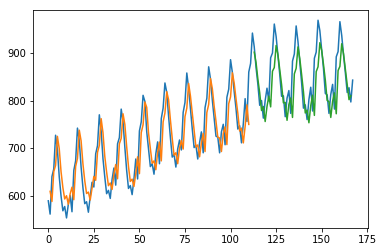

In [30]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_set))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()